ValueError: x and y must have same first dimension, but have shapes (5,) and (21,)

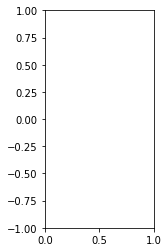

In [22]:
#波動方程式
#学籍番号:1203033123
#氏名:西田裕一

import matplotlib
import matplotlib.pyplot as plt

def Phi(x):
    return 2*x*(1-x)


def Phi2(x):
    return 0

N = 20 #空間分割数
M = 50 #時間分割数
T = 1 #時刻の上限
draw = [0,5,10,15,20,25,30,35,40,45,50] #表示するステップ

dx = 1/N
dt = 1/M
a = (dt/dx)**2


old_U = [0]*(N+1)
for k in range(N+1):
    old_U[k] = Phi(k*dx)

cur_U = [0]*(N+1)
for j in range(1,N):
    cur_U[j] = old_U[j]+(T/M)*Phi2(j*dx)+(a/2)*(old_U[j+1]-2*old_U[j]+old_U[j-1])

new_U = [0]*(N+1)
cur_U[0] = 0
cur_U[N] = 0
new_U[0] = 0
new_U[N] = 0    


fig = plt.figure()
graph = fig.add_subplot()
graph.set_xlim([0,1])
graph.set_ylim([-1,1])
graph.set_aspect('equal')


for n in range(1,M):
    for j in range(1,N):
        new_U[j] = 2*cur_U[j]-old_U[j]+a*(cur_U[j+1]-2*cur_U[j]+cur_U[j-1])
    for j in range(1,N):
        old_U[j] = cur_U[j]
        cur_U[j] = new_U[j]

    if n in draw:
        graph.plot(x,cur_U)
        graph.scatter(x,cur_U,s=30)


plt.show()